In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data= pd.read_csv('Desktop/heart.csv')
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [3]:
data.shape

(918, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# working on numerics, categorical data

In [5]:
data['HeartDisease'] = data['HeartDisease'].astype('category')
data['FastingBS'] = data['FastingBS'].astype('category')
data['HeartDisease'] = data['HeartDisease'].cat.rename_categories({1: 'Yes', 0: 'No'})  

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = data.select_dtypes(include=numerics).columns
numerical_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'], dtype='object')

In [7]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope', 'HeartDisease'],
      dtype='object')

# Statistics

In [8]:
data.describe().T.style.background_gradient(cmap = "pink")

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000


In [9]:
data.describe(include = ['object', 'category']).T


,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460
HeartDisease,918,2,Yes,508


# Analysis

In [10]:
def pie_charts(data, feature, target):
    colors = sns.color_palette('pastel')[0:5]
    fig,axes = plt.subplots(1,2,figsize=(12,8))
    labels = data[feature].unique()
    textprops = {"fontsize":15}

    axes[0].pie(data[data[target]=="No"][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[0].set_title('No {}'.format(target),fontsize=15)
    axes[1].pie(data[data[target]=="Yes"][feature].value_counts(),colors=colors, labels=labels,autopct='%1.1f%%',textprops =textprops)
    axes[1].set_title('Yes {}'.format(target),fontsize=15)

    plt.legend(title = feature, fontsize=15, title_fontsize=15)
    plt.show()

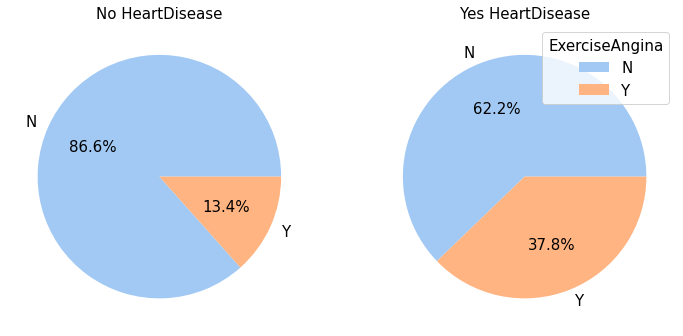

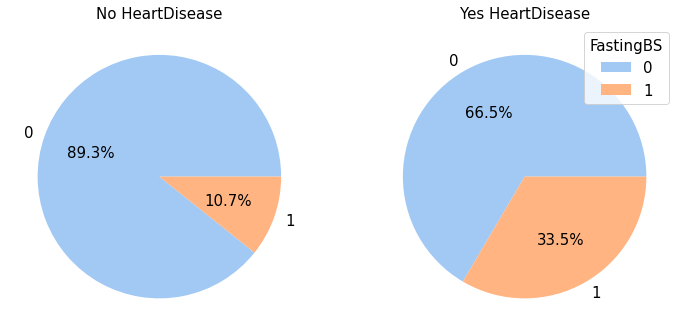

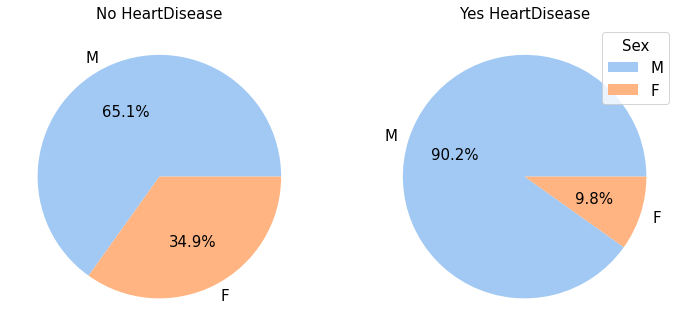

In [11]:
binary_feature = ["ExerciseAngina", "FastingBS", "Sex"]
for feature in binary_feature:
    pie_charts(data,feature,"HeartDisease")


In [12]:
def probability_calculation(feature, feature_values) : 
    
    first_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data[feature]==feature_values[0])])
    num_first_value = len(data[data[feature]==feature_values[0]])

    second_with_heart_disease = len(data[(data['HeartDisease']=='Yes') & (data[feature]==feature_values[1])])
    num_second_value = len(data[data[feature]==feature_values[1]])

    print("\n" + feature + " : \n")
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[0]), first_with_heart_disease/num_first_value)
    print('👉 Probability of {} : {} to have Heart disease:'.format(feature,feature_values[1]), second_with_heart_disease/num_second_value)

In [13]:
probability_calculation('Sex', ['M', 'F'])  #Males are approximately 3 times more likely to have heart disease than females


Sex : 

👉 Probability of Sex : M to have Heart disease: 0.6317241379310344
👉 Probability of Sex : F to have Heart disease: 0.25906735751295334


In [14]:
probability_calculation('ExerciseAngina', ['Y', 'N'])  #With Angina, the probability of having heart disease is hight


ExerciseAngina : 

👉 Probability of ExerciseAngina : Y to have Heart disease: 0.8517520215633423
👉 Probability of ExerciseAngina : N to have Heart disease: 0.3510054844606947


In [15]:
probability_calculation("FastingBS", [1,0]) #Fasting blood sugar > 120mg, the probability of having heart disease is almost 0.8 ( High )


FastingBS : 

👉 Probability of FastingBS : 1 to have Heart disease: 0.794392523364486
👉 Probability of FastingBS : 0 to have Heart disease: 0.48011363636363635


# Features

In [16]:
def distribution_categorical_features(data, feature, target, colors) :
    sns.set(rc={'figure.figsize':(14,8.27)},font_scale=1.2)
    grouped_columns = sns.countplot(x=feature, hue=target, data=data,palette=colors)
    grouped_columns.set_title('Countplot for {} {}'.format(target, feature))

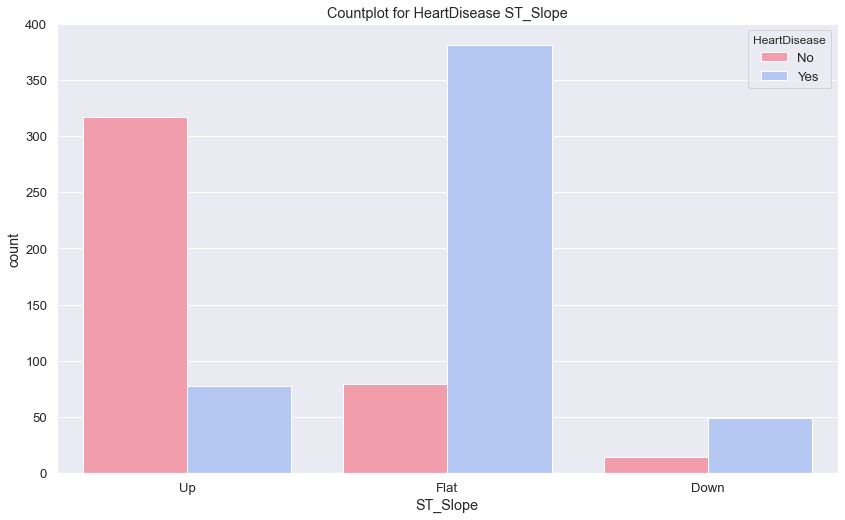

In [17]:
distribution_categorical_features(data, "ST_Slope", "HeartDisease", ["#ff8fa3","#abc4ff"])

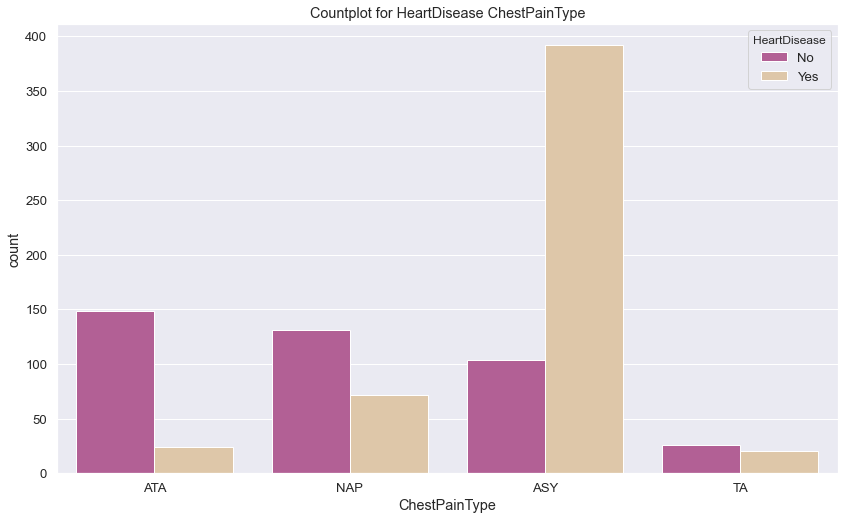

In [18]:
distribution_categorical_features(data, "ChestPainType", "HeartDisease", ["#c05299","#e7c8a0"])


In [19]:
# Most Heart Disease Patients have Chest Pain with an Asymptomatic (ASY) type.
#Most Patients who have Atypical Angina (ATA) type don't have Heart Disease.


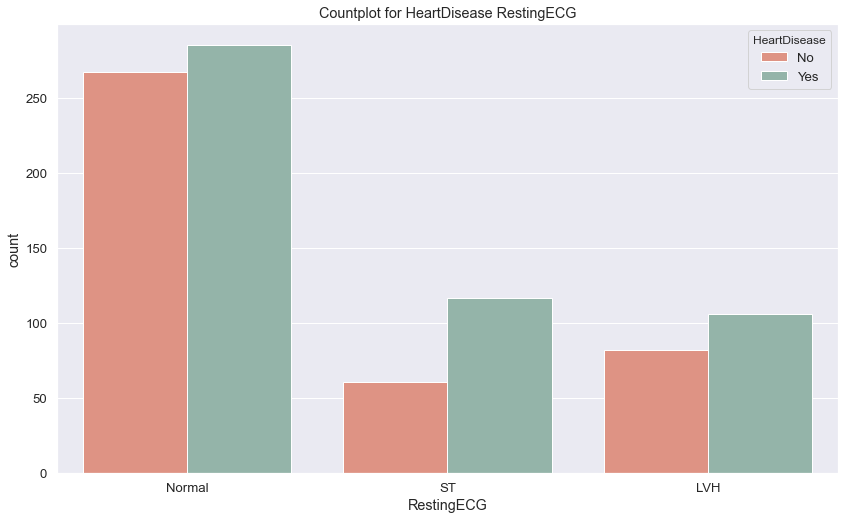

In [20]:
distribution_categorical_features(data, "RestingECG", "HeartDisease", ["#ED8975","#8FB9AA"])

In [21]:
# More than 500 patients have a normal resting ECG
# it's not a criterion for detecting heart disease because it's a bit balanced between no heart disease and the existence of the disease

[Text(0, 0, 'No'), Text(0, 0, 'Yes')]

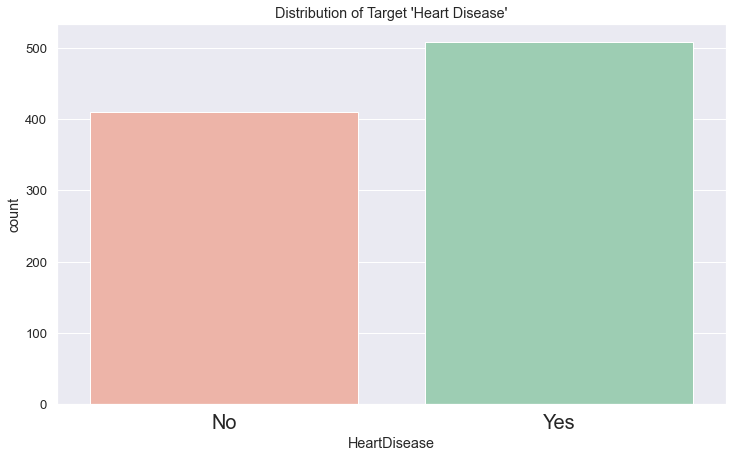

In [22]:
plt.figure(figsize=(12, 7))
heartDisease_countplot = sns.countplot(x=data.HeartDisease,palette=["#f8ad9d","#95d5b2"])
heartDisease_countplot.set_title("Distribution of Target 'Heart Disease'")
heartDisease_countplot.set_xticklabels(['No', 'Yes'], fontsize=20)

In [23]:
def kde_numerical_features(column, target) : 
    fig, ax = plt.subplots(figsize = (13,5))
    sns.kdeplot(data[data[target]=='Yes'][column], alpha=0.5,shade = True, color="red", label="HeartDisease", ax = ax)
    sns.kdeplot(data[data[target]=='No'][column], alpha=0.5,shade = True, color="#fccc79", label="NoHeartDisease ", ax = ax)
    plt.title('KDE-Plot of {}'.format(column), fontsize = 18)
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")
    ax.legend();
    plt.show()

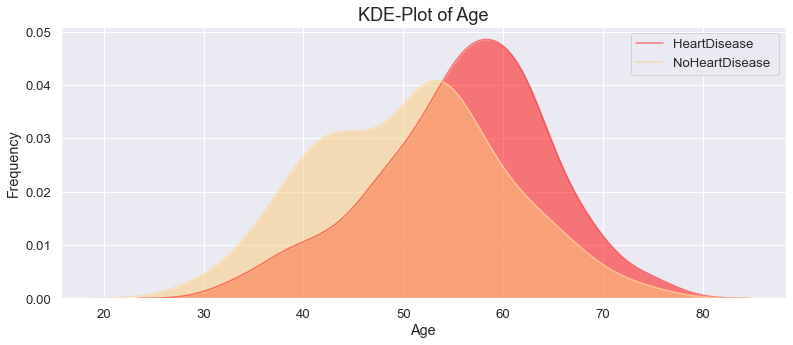

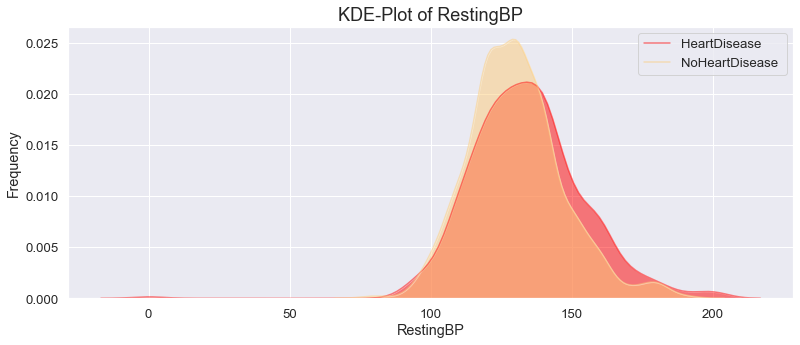

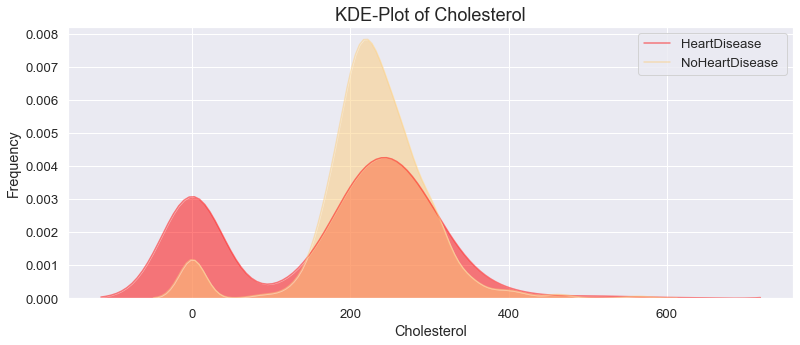

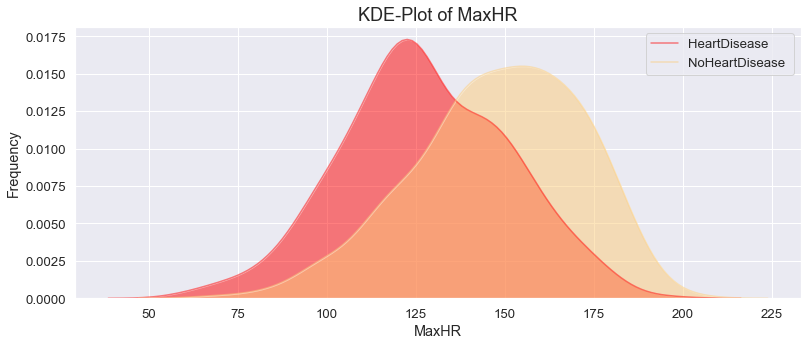

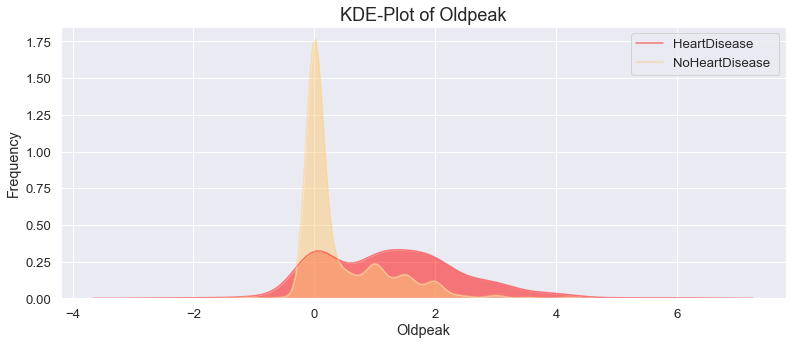

In [24]:
for column in numerical_columns : 
    kde_numerical_features(column, 'HeartDisease')


# Deleting outliers

In [31]:
def make_pretty(styler):
    styler.set_caption("Skewness")
    return styler.background_gradient(axis=None, cmap="YlGnBu")

data[numerical_columns].skew().to_frame().rename(columns={0: 'Skewness'}).sort_values(by=['Skewness'], ascending=False).style.pipe(make_pretty)

,Skewness
Oldpeak,1.022872
RestingBP,0.179839
MaxHR,-0.144359
Age,-0.195933
Cholesterol,-0.610086


In [32]:
#data1 = data[data.Cholesterol != 0]
#data1 = data1[data1.RestingBP > 70]

In [35]:
#for col in ["Cholesterol", "RestingBP"]:
#    distribution_plot(data1[col], col)

# sacling

In [47]:
final_data = pd.get_dummies(data1, columns=categorical_columns[:-1])
final_data['HeartDisease'] = final_data['HeartDisease'].cat.rename_categories({'Yes':1 , 'No': 0})
X = final_data.drop(columns=["HeartDisease","Sex_F","Sex_M"], axis=1)
y = final_data['HeartDisease']
standardizer = StandardScaler()
X_scaled = standardizer.fit_transform(X)
final_data

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,172,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160,180,156,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,98,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138,214,108,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150,195,122,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,132,1.2,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
914,68,144,193,141,3.4,1,0,1,1,0,...,0,1,0,1,0,1,0,0,1,0
915,57,130,131,115,1.2,1,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0
916,57,130,236,174,0.0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,1,0


# Classification


In [48]:
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = test_size, random_state=42)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
model=KNeighborsClassifier(n_neighbors=5)

In [52]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [53]:
y_predict=model.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

# Validation

In [55]:
import sklearn.metrics as mc

In [56]:
mc.accuracy_score(y_test,y_predict)

0.8342245989304813